Antes de começar, vamos abrir a imagem que será utilizada para a atividade.

Para este exercicio, vamos segmentar a cor roxa. Para isso, vamos utilizar o espaço de cores HSV.

In [6]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

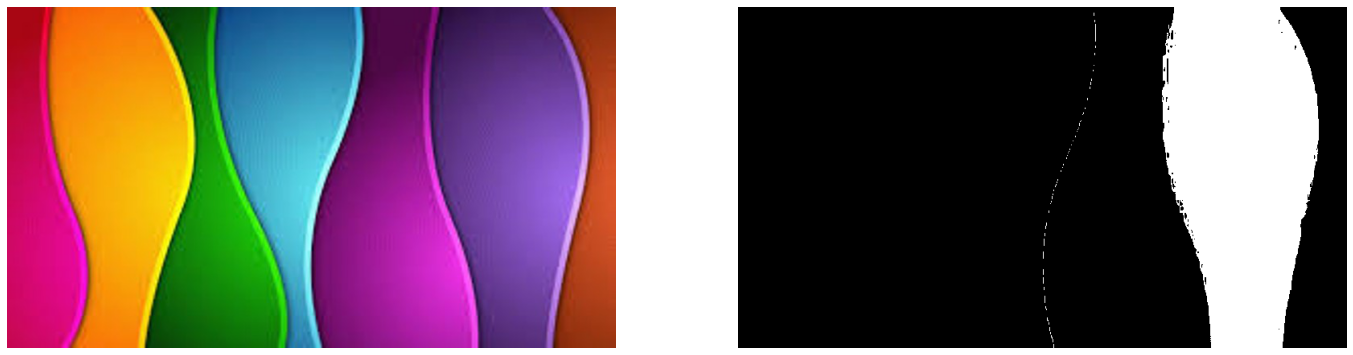

In [5]:
bgr = cv2.imread("img/cores.jpg", cv2.IMREAD_COLOR)
rgb = cv2.cvtColor(bgr, cv2.COLOR_BGR2RGB)

# Faz a conversão para o espaço HSV
hsv = cv2.cvtColor(bgr, cv2.COLOR_BGR2HSV)

# Segmenta apenas a cor violeta
menor = (260//2, 50, 50)
maior = (280//2, 255, 255)
mask_violeta = cv2.inRange(hsv, menor, maior)

plt.figure(figsize=(24, 8))
plt.subplot(121)
plt.axis('off')
plt.imshow(rgb)

plt.subplot(122)
plt.axis('off')
plt.imshow(mask_violeta, cmap="gray", vmin=0, vmax=255)
plt.show()


# Operações morfológicas


Podemos reparar dos exemplos anteriores que muitas vezes as máscaras obtidas aparecem com *buracos* e/ou *ilhas*, de forma que:
- **Buracos** são pequenos segmentos de pixels pretos dentro de regiões de pixels brancos
- **Ilhas** são pequenos segmentos de pixels brancos dentro de regiões de pixels pretos.

Em geral, buracos e ilhas são regiões onde houve falha na segmentação da imagem. Para tratar imagfens com esses problemas,
a área de processamento de imagens usa um conjunto de técnicas conhecidas como *Morfologia Matemática*. Elas surgiram no problema de análise da estrutira de cristais, mas obtiveram muito sucesso na área de processamento de imagens.

As operações de morfologia matemática se baseima na ideia de um *elemento estruturante* ou *kernel*, que podemos pensar em uma pequena janela quadrada, com as dimensões de poucos pixels, que vasculham a imagem realizando uma de duas operações básicas:

1. **Erosão:**  ao encontrar um pixel preto dentro da janela, todos os pixels que estão dentro dessa janela ficam pretos

![](img/erodbin.gif)

https://homepages.inf.ed.ac.uk/rbf/HIPR2/erode.htm (exemplo com elemento estruturante 3x3)

![](img/erosion_j.png)

2. **Dilatação**: ao encontrar um pixel branco dentro da janela, todos os pixels que estão dentro dessa janela ficam brancos

![](img/diltbin.gif)

https://homepages.inf.ed.ac.uk/rbf/HIPR2/dilate.htm (exemplo com elemento estruturante 3x3)

![](img/dilation_j.png)

A partir dessas duas operações, diversas outras são possíveis. Dessas, operações que encontram bastante utilidade prática em processamento de imagens é a de *abertura* e *fechamento*. 


**DICA:** Mais informações estão disponíveis no tutorial do OpenCV: https://docs.opencv.org/4.x/d9/d61/tutorial_py_morphological_ops.html


### Abertura
Na operação de abertura são realizadas as operações de erosão e depois de dilatação. A ideia é eliminar pequenas ilhas, que seriam eliminadas na erosão, e depois restaurar as dimensões dos agrupamentos brancos restantes. Vamos ver um exemplo de uso da abertura na máscara em que identificamos os trechos de cor violeta     

Nos exemplos abaixo vamos utilizar um elemento estrutural no formato de um quadro 3x3, enquanto exploramos os efeitos, pense no que aconteceria se utilizássemos um elemento estruturante maior, como um quadro 5x5 ou 100x100. Ou ainda, o que aconteceria se utilizássemos um elemento estruturante com um formato diferente, como um círculo?


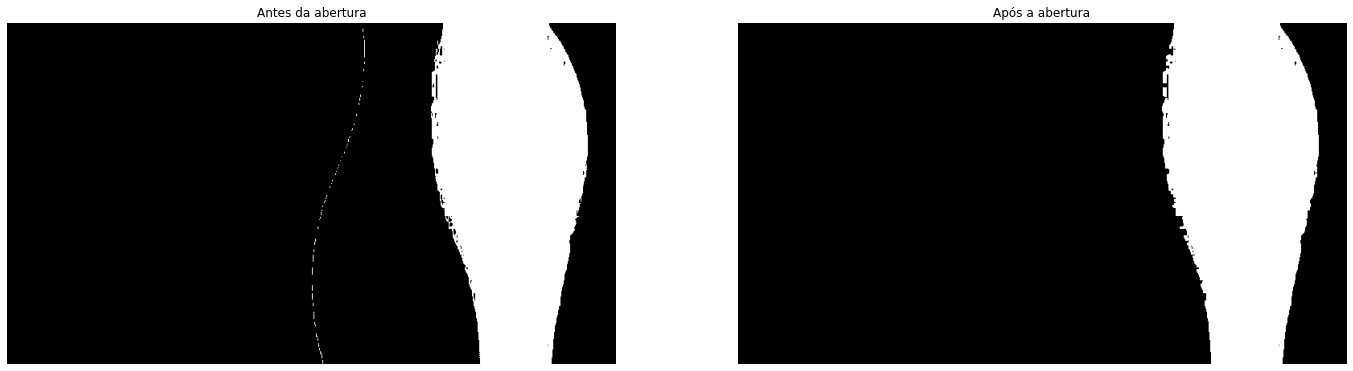

In [7]:
# Cria uma janela 3x3 como elemento estruturante este elemente tem a forma de um quadrado
elemento_estrut = np.ones([3,3])

# realiza a abertura
mask_violeta_abertura = cv2.morphologyEx(mask_violeta, cv2.MORPH_OPEN, elemento_estrut)

plt.figure(figsize=(24, 8))
plt.subplot(121)
plt.axis('off')
plt.title("Antes da abertura")
plt.imshow(mask_violeta, cmap="gray", vmin=0, vmax=255)

plt.subplot(122)
plt.axis('off')
plt.title("Após a abertura")
plt.imshow(mask_violeta_abertura, cmap="gray", vmin=0, vmax=255)
plt.show()

### Fechamento
Na operação de fechamento são realizadas as operações de dilatação e depois de erosão. A ideia é fechar pequenos buracos, que seriam eliminadas na silatação, e depois restaurar as dimensões dos agrupamentos restantes. Vamos ver um exemplo de uso do fechamento na máscara em que identificamos os trechos de cor violeta

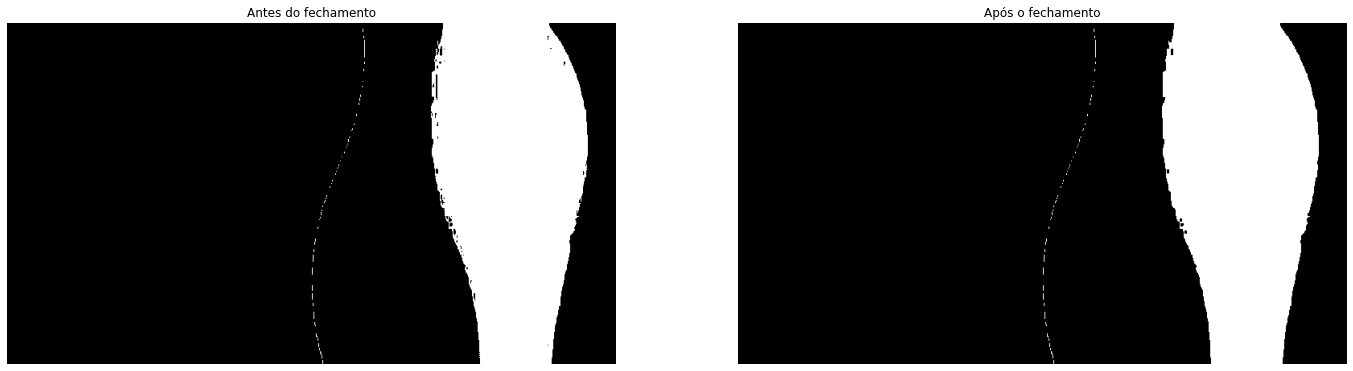

In [8]:
# Cria uma janela 3x3 como elemento estruturante
elemento_estrut = np.ones([3,3])

# realiza a abertura
mask_violeta_fechamento = cv2.morphologyEx(mask_violeta, cv2.MORPH_CLOSE, elemento_estrut)

plt.figure(figsize=(24, 8))
plt.subplot(121)
plt.axis('off')
plt.title("Antes do fechamento")
plt.imshow(mask_violeta, cmap="gray", vmin=0, vmax=255)

plt.subplot(122)
plt.axis('off')
plt.title("Após o fechamento")
plt.imshow(mask_violeta_fechamento, cmap="gray", vmin=0, vmax=255)
plt.show()

**EXPLORE:** Agora modifique o elemento estrutural, ou kernel, para uma ellipse utilizando a função `cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (7,7))`. O que acontece com a imagem?

# Tarefa 1: Implementação do módulo de visão - Parte 2

Agora vamos continuar implementando os recursos do módulo de visão. Ao abrir a GUI, pode ter notado que ela dá a opção de escolher o formato do kernel e aplicar uma transformação morphologica na máscara.

Portanto o objetivo agora é:

1 - Implementar a função `configure_kernel`, dependendo da argumento `type` ela deve salvar na variável da classe `self.kernel` um kernel quadrado ou eliptico com o tamanho especificado pelo argumento `kernel_size`.

2 - Implementar a função `morphological_transform`, que deve aplicar as transformações morfológicas especificadas pelo argumento `types` na máscara especificada pelo argumento `mask`. Observe que o argumento `types` é uma lista de strings, onde cada string pode ser `erode`, `dilate`, `open` ou `close`. Para cada string na lista, deve ser aplicada a transformação correspondente na máscara.

3 - Execute novamente a GUI e explore o novo recurso implementado.